In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#dataset
dataset=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

#printing first 5 rows in the dataset
dataset.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#printing number of rows and columns in the dataset
print(f"The number of rows in a dataset {dataset.shape[0]}")
print(f"The number of columns in a dataset {dataset.shape[1]}")

The number of rows in a dataset 1025
The number of columns in a dataset 14


In [4]:
#printing nullvalues in all columns
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
#printing duplicate values in the dataset
print(f"Duplicated values in a dataset: {dataset.duplicated().sum()}")
AllRows=dataset.shape[0]
print(f"The number of rows in the dataset before removing duplicates: {AllRows}")

Duplicated values in a dataset: 723
The number of rows in the dataset before removing duplicates: 1025


In [6]:
#removing these duplicate values
dataset.drop_duplicates(inplace=True)
AllRows_RMDUP=dataset.shape[0]
print(f"The number of rows in the dataset after removing duplicates: {AllRows_RMDUP}")

The number of rows in the dataset after removing duplicates: 302


In [7]:
#making sure that duplicated values=723 
duplicated_values=AllRows-AllRows_RMDUP
print(duplicated_values)

723


In [8]:
#seeing the number of elements in the classes of the output column "target"
dataset["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

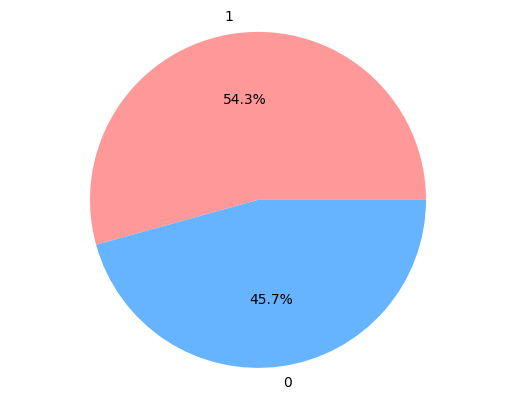

In [9]:
#showing pieplot of the output
labels = dataset['target'].value_counts().index
sizes = dataset['target'].value_counts().values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Define custom colors

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

In [10]:
#determining the features and the output columns of the dataset
y=dataset['target'] 
x=dataset.drop("target",axis=1)
#print(x.shape[1])

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44,shuffle=True)


In [12]:
#code of classification using SVC
from sklearn.svm import SVC
SVMModel = SVC(kernel='linear', random_state=33)
SVMModel.fit(x_train, y_train)
y_pred_list=SVMModel.predict(x_test)
#printing y_pred and y_test
y_test_list=list(y_test)
for x in range(10):
    print(f"predict is: {y_pred_list[x]}, and real is: {y_test_list[x]} ")


predict is: 0, and real is: 0 
predict is: 1, and real is: 1 
predict is: 0, and real is: 0 
predict is: 1, and real is: 1 
predict is: 0, and real is: 0 
predict is: 1, and real is: 1 
predict is: 0, and real is: 0 
predict is: 0, and real is: 0 
predict is: 0, and real is: 0 
predict is: 1, and real is: 1 


In [15]:
print(y_pred_list.shape[0])
print(y_test.shape[0])

error=0
true=0     #"Error values are 10 and true values are 66"
for x,y in zip(y_test_list,y_pred_list):
    if x!=y:error+=1
    else:true+=1
        
print(f"Error values are {error} and true values are {true}")    

76
76
Error values are 9 and true values are 67


(-1.0999999723447504,
 1.0999999963851306,
 -1.0999997913758817,
 1.0999997702233133)

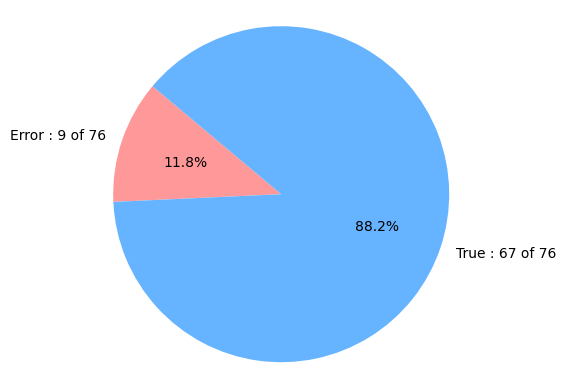

In [16]:
# showing a pie plot for showing error and true percentage in the 
total_number=y_test.shape[0]
labels = f'Error : {error} of {total_number}', f'True : {true} of {total_number}'
sizes = [error, true]
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle. 1    



In [17]:
# calculating accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_list, y_pred_list)
precision = precision_score(y_test_list, y_pred_list)
recall = recall_score(y_test_list, y_pred_list)
f1 = f1_score(y_test_list, y_pred_list)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.881578947368421
Precision: 0.9302325581395349
Recall: 0.8695652173913043
F1 Score: 0.898876404494382
